<a href="https://colab.research.google.com/github/orannahum/simple_example_of_Principal_Components_Analysis/blob/main/PCA_plane.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[0.90946569 0.08816839 0.00236591]


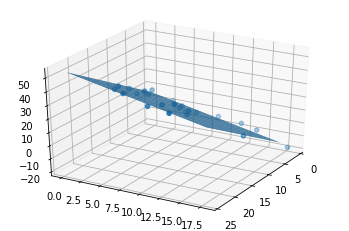

In [18]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

X = np.array([[24,13,38],[8,3,17],[21,6,40],[1,14,-9],[9,3,21],[7,1,14],[8,7,11],[10,16,3],[1,3,2],
    [15,2,30],[4,6,1],[12,10,18],[1,9,-4],[7,3,19],[5,1,13],[1,12,-6],[21,9,34],[8,8,7],
  [1,18,-18],[15,8,25],[16,10,29],[7,0,17],[14,2,31],[3,7,0],[5,6,7]])
pca = PCA(n_components=3)

pca.fit(X)
eig_vec = pca.components_

print(pca.explained_variance_ratio_)
# [0.90946569 0.08816839 0.00236591]
# Percentage of variance explain by last vector is less 0.2%

# This is the normal vector of minimum variance
normal = eig_vec[2, :]  # (a, b, c)
centroid = np.mean(X, axis=0)

# Every point (x, y, z) on the plane should satisfy a*x+b*y+c*z = d
# Taking centroid as a point on the plane
d = -centroid.dot(normal)

# Draw plane
xx, yy = np.meshgrid(np.arange(np.min(X[:, 0]), np.max(X[:, 0])), np.arange(np.min(X[:, 1]), np.max(X[:, 1])))

z = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]

# plot the surface
plt3d = plt.figure().gca(projection='3d')
plt3d.plot_surface(xx, yy, z)
plt3d.scatter(*(X.T))
plt3d.view_init(30, 30)
plt.show()

